In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
target=train.iloc[:,-1]
train.drop(['id','target'], axis = 1,  inplace= True)

In [4]:
scaler = MinMaxScaler()
# min_max 값 학습
scaler.fit(train)
train=scaler.transform(train)
train = pd.DataFrame(train)

In [5]:
train.shape
test.shape

(144368, 94)

In [6]:
train_corr=train.corr()
train_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,1.000000,0.031332,-0.027807,-0.027529,0.042973,0.043603,0.298952,0.056321,-0.032285,0.097776,...,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
1,0.031332,1.000000,0.082573,0.134987,0.020926,0.041343,0.222386,0.019815,-0.025630,0.051925,...,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
2,-0.027807,0.082573,1.000000,0.583523,0.010880,0.004288,0.001294,-0.053462,-0.063551,0.036944,...,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
3,-0.027529,0.134987,0.583523,1.000000,0.017290,0.014059,0.014490,-0.046184,-0.046250,0.059514,...,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
4,0.042973,0.020926,0.010880,0.017290,1.000000,0.145355,0.075047,0.035861,-0.024708,0.091324,...,0.467329,0.034062,0.013879,0.013999,-0.019201,0.119951,0.004842,0.012012,0.065331,0.002038


In [7]:
a = []
for i in train_corr.columns:
    for j in train_corr.index:
        if train_corr.loc[j,i] > 0.5 and train_corr.loc[j,i] != 1:
            print(f'columns : {i} and index {j}', train_corr.loc[j,i])
            a.append(i)

columns : 1 and index 89 0.515021939787838
columns : 2 and index 3 0.5835232203459249
columns : 2 and index 10 0.5962430076613688
columns : 2 and index 26 0.5083695809016442
columns : 2 and index 27 0.5513979091523036
columns : 2 and index 45 0.7775172869087756
columns : 2 and index 53 0.6940483715101846
columns : 3 and index 2 0.5835232203459249
columns : 3 and index 34 0.5544741429334893
columns : 3 and index 53 0.525455656743003
columns : 6 and index 77 0.5670836123120604
columns : 7 and index 35 0.606706773376812
columns : 8 and index 31 0.5684174196578917
columns : 8 and index 63 0.7029513594531267
columns : 10 and index 2 0.5962430076613688
columns : 10 and index 26 0.5994842086997451
columns : 10 and index 45 0.5792721477422468
columns : 10 and index 60 0.5438583070296544
columns : 10 and index 79 0.5618432241507125
columns : 13 and index 24 0.5579287428125167
columns : 14 and index 71 0.7646636230211049
columns : 21 and index 53 0.5021678096523746
columns : 24 and index 13 0.55

In [8]:
train

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.018182,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.013158,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.016393,0.0,0.0,0.014286,0.315789,0.1,0.131579,0.000000,0.000000,0.033333,...,0.289474,0.000000,0.015385,0.029851,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.018182,0.000000,0.000000,0.0,0.000000,0.007692,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,0.016393,0.0,0.0,0.014286,0.052632,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.018182,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.105263,0.0
61874,0.065574,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.030769,0.000000,0.0,0.032787,0.000000,0.000000,0.052632,0.0
61875,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.039474,0.023256,0.000000,...,0.000000,0.000000,0.046154,0.014925,0.0,0.000000,0.000000,0.000000,0.000000,0.0
61876,0.016393,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.016393,0.000000,0.057692,0.526316,0.0


# 2-3

<AxesSubplot:xlabel='2', ylabel='3'>

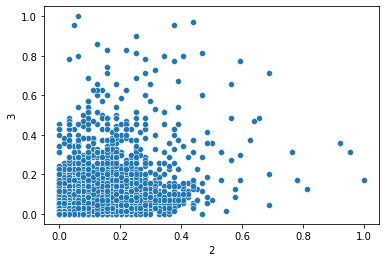

In [9]:
sns.scatterplot(data = train, x = 2, y =3)

<AxesSubplot:xlabel='2', ylabel='target'>

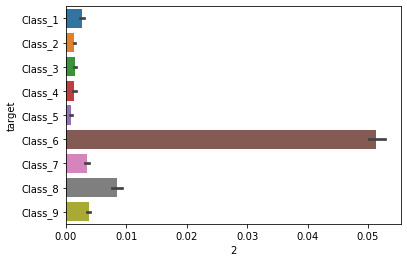

In [10]:
sns.barplot(data = train, x = 2, y = target)

<AxesSubplot:xlabel='3', ylabel='target'>

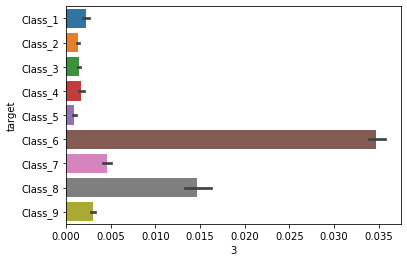

In [11]:
sns.barplot(data = train, x = 3, y = target)

- 2번 3번이 연관이 잇는 것 같다

# 1 - 89

<AxesSubplot:xlabel='1', ylabel='target'>

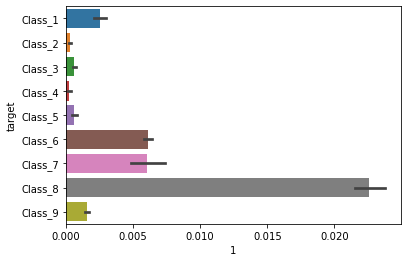

In [12]:
sns.barplot(data = train, x = 1, y = target)

<AxesSubplot:xlabel='89', ylabel='target'>

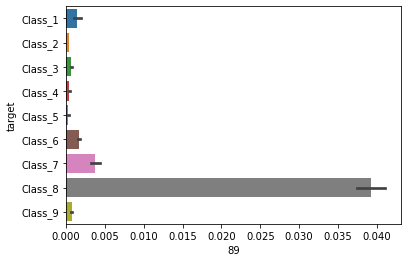

In [13]:
sns.barplot(data = train, x = 89, y = target)

# 2- 10

<AxesSubplot:xlabel='2', ylabel='target'>

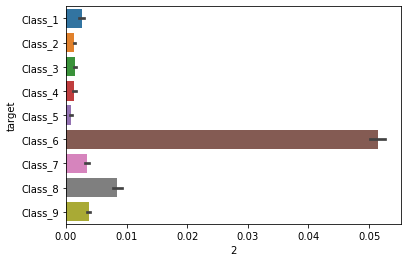

In [14]:
sns.barplot(data = train, x = 2, y = target)

<AxesSubplot:xlabel='10', ylabel='target'>

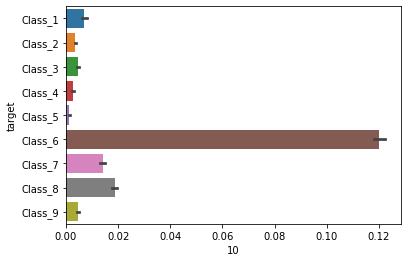

In [15]:
sns.barplot(data = train, x = 10, y = target)

In [16]:
a=set(a)
print(a)

{1, 2, 3, 6, 7, 8, 10, 13, 14, 21, 24, 26, 27, 28, 29, 30, 31, 34, 35, 38, 44, 45, 51, 53, 60, 63, 68, 71, 73, 76, 77, 79, 81, 83, 89}


In [17]:
a=list(a)
a

[1,
 2,
 3,
 6,
 7,
 8,
 10,
 13,
 14,
 21,
 24,
 26,
 27,
 28,
 29,
 30,
 31,
 34,
 35,
 38,
 44,
 45,
 51,
 53,
 60,
 63,
 68,
 71,
 73,
 76,
 77,
 79,
 81,
 83,
 89]

In [18]:
train=train[a]

In [19]:
train

,1,2,3,6,7,8,10,13,14,21,...,63,68,71,73,76,77,79,81,83,89
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.045455,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.018519,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.013699,0.0,0.000000,0.004329,0.000000,0.0125,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.014286,0.131579,0.000000,0.000000,0.026316,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.004329,0.000000,0.0000,0.018519,0.083333,0.289474,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.007692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,0.0,0.0,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.318182,...,0.013699,0.0,0.033333,0.008658,1.000000,0.0000,0.000000,0.000000,0.000000,0.000000
61874,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.060606,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.034483,0.0000,0.000000,0.000000,0.000000,0.000000
61875,0.0,0.0,0.000000,0.000000,0.039474,0.023256,0.000000,0.030303,0.000000,0.000000,...,0.000000,0.0,0.066667,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
61876,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000


In [20]:
le =LabelEncoder()
target=le.fit_transform(target)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.2, random_state = 42)
print('X_train의 형태' , X_train.shape)
print('X_test의 형태' , X_test.shape)
print('y_train의 형태' , y_train.shape)
print('y_test의 형태' , y_test.shape)

X_train의 형태 (49502, 35)
X_test의 형태 (12376, 35)
y_train의 형태 (49502,)
y_test의 형태 (12376,)


In [22]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
np.mean(y_test == y_pred)

0.6668552036199095

In [23]:
# print(gbc.score(X_test, y_test))

In [24]:
clf = RandomForestClassifier(n_estimators = 300, criterion = 'gini', max_depth=100, random_state = 10)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
np.mean(y_test == y_pred)

0.6947317388493859

In [25]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
np.mean(y_test == y_pred)

[15:13:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6894796380090498